In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
diabetes=load_diabetes(as_frame=True,scaled=False)
X=diabetes.data
y=diabetes.target
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [ ]:
diabetes=load_diabetes(as_frame=True,scaled=True)
XT=diabetes.data
yT=diabetes.target
XT

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


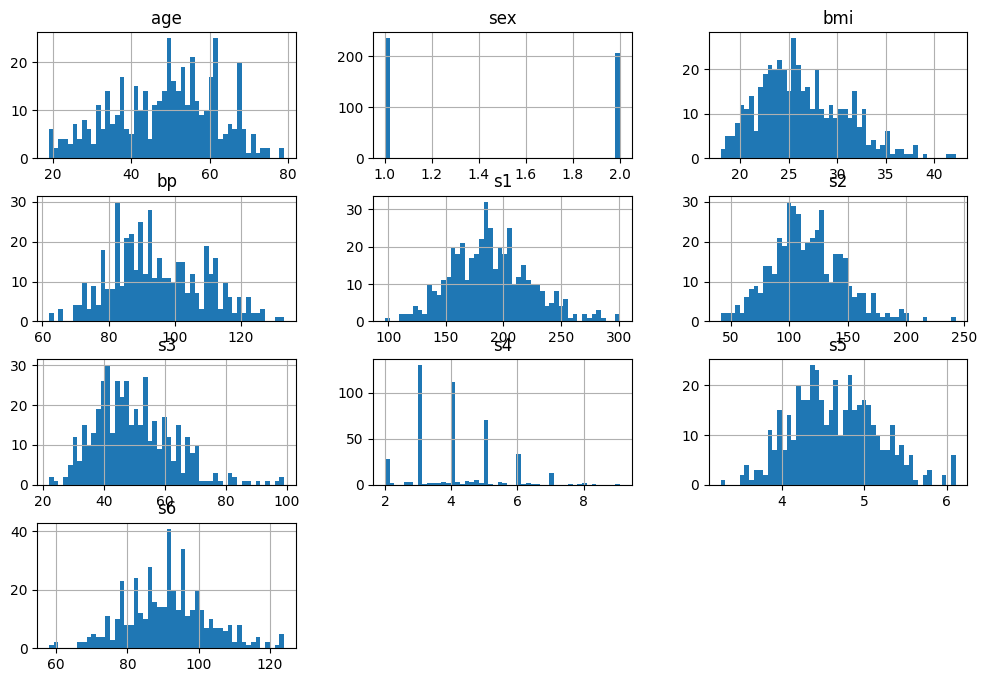

In [ ]:
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(12, 8))
plt.show()

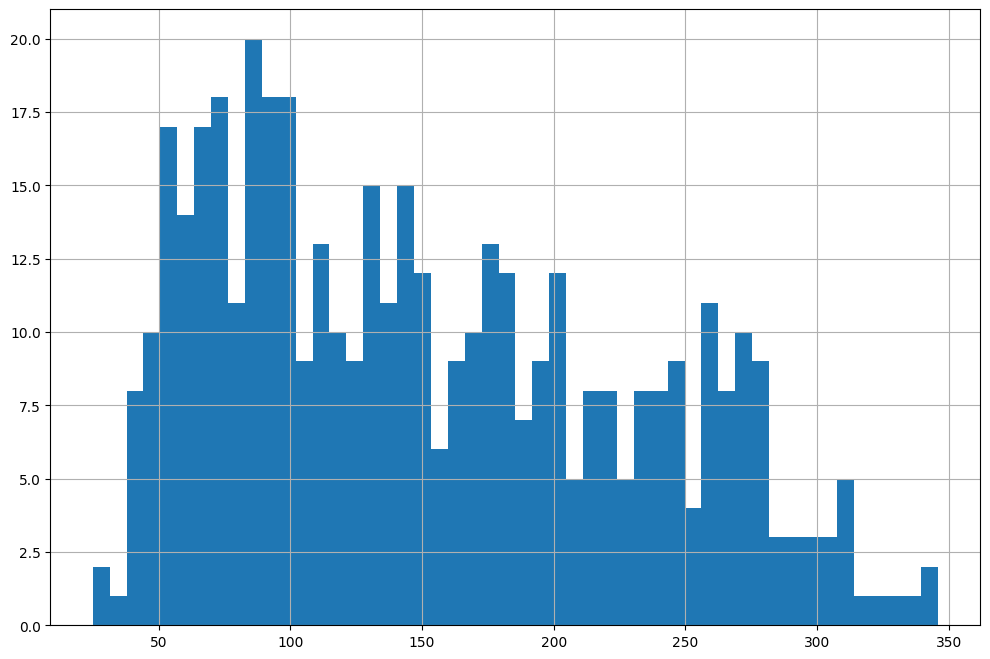

In [ ]:
import matplotlib.pyplot as plt
y.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

##Regresion Lineal

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Create model
linear_model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit model
linear_model.fit(X_train, y_train)

# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Linear Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Linear Model Mean Squared Error (test): {test_mse:.2f}')

Linear Model Mean Squared Error (train): 2868.55
Linear Model Mean Squared Error (test): 2900.19


In [ ]:
linear_model.get_params()['steps']

[('scaler', StandardScaler()), ('regressor', LinearRegression())]

In [ ]:
linear_model.named_steps['regressor'].coef_

array([  1.75375799, -11.51180908,  25.60712144,  16.82887167,
       -44.44885564,  24.64095356,   7.67697768,  13.1387839 ,
        35.16119521,   2.35136365])

In [ ]:
linear_model.named_steps

{'scaler': StandardScaler(), 'regressor': LinearRegression()}

In [ ]:
X_train.info()
#X_array = X_train.to_numpy()
#y_array = y_train.to_numpy()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 17 to 102
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     353 non-null    float64
 1   sex     353 non-null    float64
 2   bmi     353 non-null    float64
 3   bp      353 non-null    float64
 4   s1      353 non-null    float64
 5   s2      353 non-null    float64
 6   s3      353 non-null    float64
 7   s4      353 non-null    float64
 8   s5      353 non-null    float64
 9   s6      353 non-null    float64
dtypes: float64(10)
memory usage: 30.3 KB


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridgereg = Ridge() # ¿Por qué se inicializa asi?

## Ridge

In [ ]:
from sklearn.pipeline import make_pipeline

# Create model
ridgereg = make_pipeline(StandardScaler(), Ridge(alpha=1))
#1e-5 = 10^-5 = 0.00001

# Train the model
ridgereg.fit(X_train, y_train)

# Make predictions
y_train_pred_l2 = ridgereg.predict(X_train)
y_test_pred_l2 = ridgereg.predict(X_test)

# Evaluate the model
train_mse_l2 = mean_squared_error(y_train, y_train_pred_l2)
test_mse_l2 = mean_squared_error(y_test, y_test_pred_l2)

print(f'Ridge Regression Model Mean Squared Error (train): {train_mse_l2:.2f}')
print(f'Ridge Regression Model Ridge Mean Squared Error (test): {test_mse_l2:.2f}')

Ridge Regression Model Mean Squared Error (train): 2870.30
Ridge Regression Model Ridge Mean Squared Error (test): 2892.01


In [ ]:
ridgereg.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('ridge', Ridge(alpha=1))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=1),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 1,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [ ]:
ridgereg.get_params()['steps']

[('standardscaler', StandardScaler()), ('ridge', Ridge(alpha=1))]

In [ ]:
ridgereg.named_steps['ridge'].coef_

array([  1.80734179, -11.44818951,  25.73269892,  16.73429974,
       -34.67195409,  17.05307485,   3.36991411,  11.76426044,
        31.3783838 ,   2.45813922])

## Encontrar el mejor Alpha con Ridge

In [ ]:
alphas = np.logspace(-4, 2, 100)

mse_test_res = []
mse_train_res = []
coefficients = []
for alpha in alphas:
    # Change ridge params
    ridgereg.set_params(ridge__alpha=alpha)

    # Train the model
    ridgereg.fit(X_train, y_train)

    # Make predictions
    y_test_pred = ridgereg.predict(X_test)
    y_train_pred = ridgereg.predict(X_train)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_test_res.append(mse_test)
    mse_train_res.append(mse_train)

    # Save the coefficients
    coefficients.append(ridgereg.named_steps['ridge'].coef_)

In [ ]:
best_index = np.argmin(mse_test_res)
best_alpha = alphas[best_index]
print(best_alpha)
minimo_alpha_ridge = min(mse_test_res)
print(minimo_alpha_ridge)

65.79332246575683
2854.0437955342554


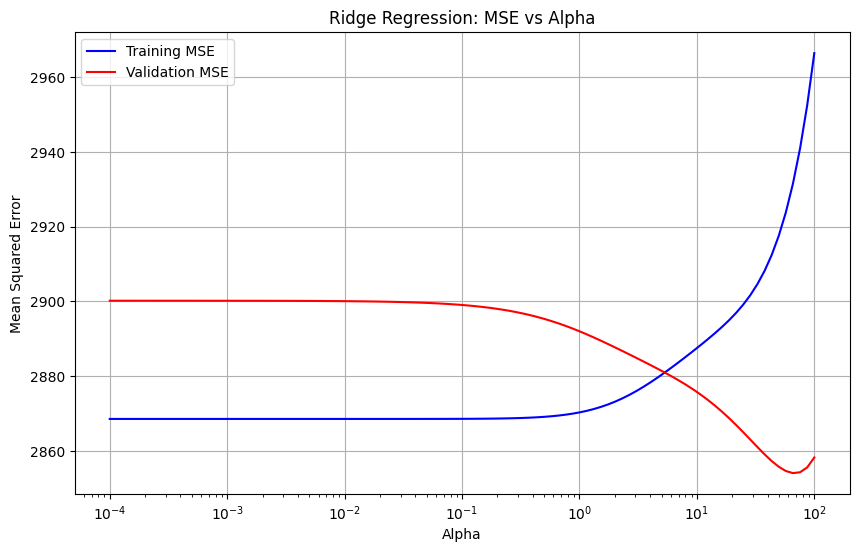

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_res, label='Training MSE', color='blue')
plt.plot(alphas, mse_test_res, label='Validation MSE', color='red')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: MSE vs Alpha')
plt.legend()
plt.grid()
plt.show()

## Visualizacion de Coeficientes

In [ ]:
# Convert coefficients list to a numpy array for easier manipulation
coeff_array = np.array(coefficients)

In [ ]:
coeff_array.shape

(100, 10)

In [ ]:
n_features = coeff_array.shape[1]
n_features

10

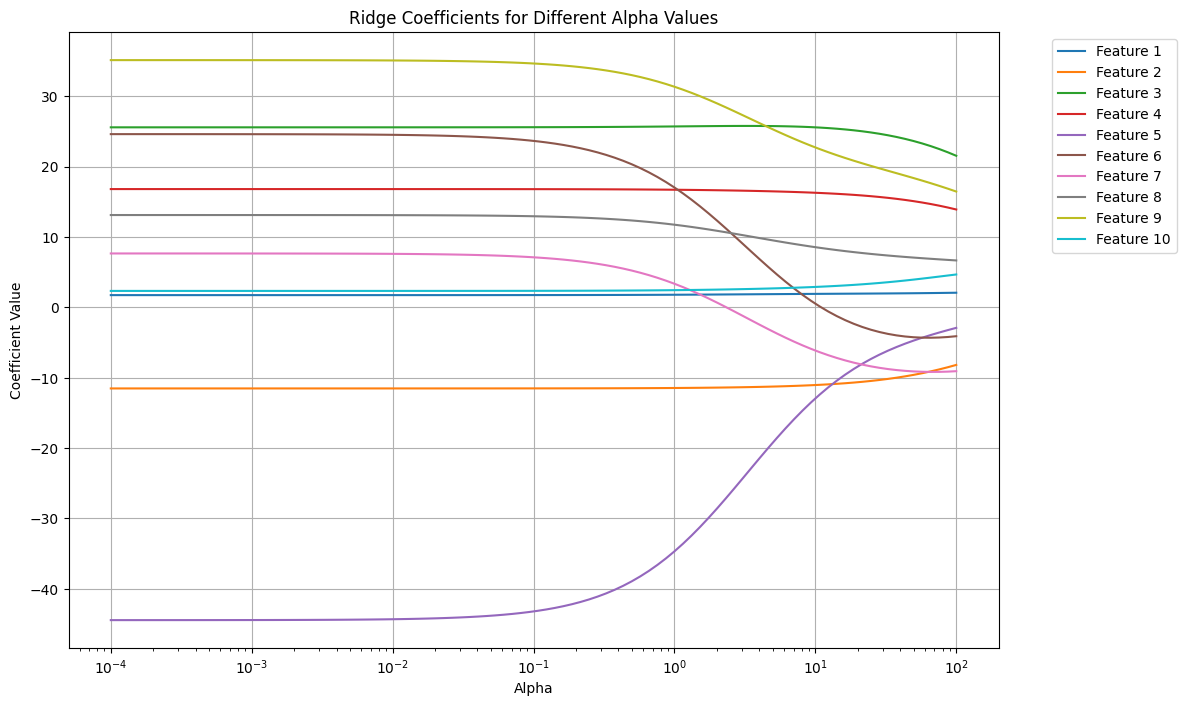

In [ ]:
# Plot the coefficients for different alpha values
plt.figure(figsize=(12, 8))

# Number of features in the dataset
n_features = coeff_array.shape[-1]

# Plot each feature's coefficient
for i in range(n_features):
    plt.plot(alphas, coeff_array[:,i], label=f'Feature {i+1}') # Aca lo tuve que modificar coeff_array[:,0,i]

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients for Different Alpha Values')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

## Entrenamiento con mejor Alpha

In [ ]:
ridgereg = make_pipeline(StandardScaler(), Ridge(alpha=65.79))

ridgereg.fit(X_train, y_train)

# Make predictions
y_train_pred_l2 = ridgereg.predict(X_train)
y_test_pred_l2 = ridgereg.predict(X_test)

# Evaluate the model
train_mse_l2 = mean_squared_error(y_train, y_train_pred_l2)
test_mse_l2 = mean_squared_error(y_test, y_test_pred_l2)

print(f'Ridge Regression Model Mean Squared Error (train): {train_mse_l2:.2f}')
print(f'Ridge Regression Model mejor alpha Mean Squared Error (test): {test_mse_l2:.2f}')

# visualize_fit(X_train, y_train, ridgereg, 'Ridge Regression on Non-Linear Data')

Ridge Regression Model Mean Squared Error (train): 2931.53
Ridge Regression Model mejor alpha Mean Squared Error (test): 2854.04


##Usando grid-search con Ridge

In [ ]:
ridge = make_pipeline(StandardScaler(), Ridge())

ridge.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('ridge', Ridge())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'ridge': Ridge(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [ ]:
prefix = 'ridge__'
# Define the grid of alpha values to search
param_grid = {
    prefix + 'alpha': alphas,
    prefix + 'fit_intercept':[True, False],
    'standardscaler__with_mean' :[True, False]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

# Model
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-04, 1.14975700e-04, 1.32194115e-04, 1.51991108e-04,
       1.74752840e-04, 2.00923300e-04, 2.31012970e-04, 2.65608778e-04,
       3.05385551e-04, 3.51119173e-04, 4.03701726e-04, 4.64158883e-04,
       5.33669923e-04, 6.13590727e-04, 7.0548...
       1.23284674e+01, 1.41747416e+01, 1.62975083e+01, 1.87381742e+01,
       2.15443469e+01, 2.47707636e+01, 2.84803587e+01, 3.27454916e+01,
       3.76493581e+01, 4.32876128e+01, 4.97702356e+01, 5.72236766e+01,
       6.57933225e+01, 7.56463328e+01, 8.69749003e+01, 1.00000000e+02]),
                         'ridge__fit_intercept': [True, False],
                         'standardscaler__with_mean': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'ridge__alpha': 28.48035868435805,
 'ridge__fit_intercept': True,
 'standardscaler__with_mean': True}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=28.48035868435805))])


In [ ]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_[prefix + 'alpha']

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse_grid_ridge = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error con Grid Search y Ridge: {mse_grid_ridge}")
print(f"Best Alpha: {best_alpha}")

Mean Squared Error con Grid Search y Ridge: 2863.033470470982
Best Alpha: 28.48035868435805


In [ ]:
# Get detailed results from Grid Search # ¿Cual es la diferencia con MSE?
results = grid_search.cv_results_
alphas_ = []
# Print grid search results
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {-mean_score:.4f} for Alpha: {params[prefix + 'alpha']}")
    alphas_.append(params[prefix + 'alpha'])

Mean Test Score: 3143.0138 for Alpha: 0.0001
Mean Test Score: 3143.0138 for Alpha: 0.0001
Mean Test Score: 26859.8557 for Alpha: 0.0001
Mean Test Score: 3305.5410 for Alpha: 0.0001
Mean Test Score: 3143.0136 for Alpha: 0.00011497569953977356
Mean Test Score: 3143.0136 for Alpha: 0.00011497569953977356
Mean Test Score: 26859.8554 for Alpha: 0.00011497569953977356
Mean Test Score: 3305.5409 for Alpha: 0.00011497569953977356
Mean Test Score: 3143.0134 for Alpha: 0.00013219411484660288
Mean Test Score: 3143.0134 for Alpha: 0.00013219411484660288
Mean Test Score: 26859.8550 for Alpha: 0.00013219411484660288
Mean Test Score: 3305.5408 for Alpha: 0.00013219411484660288
Mean Test Score: 3143.0131 for Alpha: 0.0001519911082952933
Mean Test Score: 3143.0131 for Alpha: 0.0001519911082952933
Mean Test Score: 26859.8547 for Alpha: 0.0001519911082952933
Mean Test Score: 3305.5406 for Alpha: 0.0001519911082952933
Mean Test Score: 3143.0128 for Alpha: 0.0001747528400007683
Mean Test Score: 3143.0128 f

In [ ]:
df = pd.DataFrame(results)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,param_ridge__fit_intercept,param_standardscaler__with_mean,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006667,0.000747,0.002754,0.000234,0.000100,True,True,"{'ridge__alpha': 0.0001, 'ridge__fit_intercept...",-2759.439553,-3473.356027,-2713.085496,-3192.299100,-3576.889057,-3143.013847,355.463167,194
1,0.005856,0.000096,0.002535,0.000044,0.000100,True,False,"{'ridge__alpha': 0.0001, 'ridge__fit_intercept...",-2759.439553,-3473.356027,-2713.085496,-3192.299100,-3576.889057,-3143.013847,355.463167,193
2,0.007542,0.002300,0.003793,0.002010,0.000100,False,True,"{'ridge__alpha': 0.0001, 'ridge__fit_intercept...",-27513.093907,-25721.953278,-28862.618939,-25667.598381,-26534.013921,-26859.855685,1205.010627,400
3,0.006337,0.000222,0.002767,0.000064,0.000100,False,False,"{'ridge__alpha': 0.0001, 'ridge__fit_intercept...",-3136.077894,-3305.361389,-2935.119992,-3495.893556,-3655.252308,-3305.541028,254.739708,286
4,0.006308,0.000117,0.002710,0.000053,0.000115,True,True,"{'ridge__alpha': 0.00011497569953977356, 'ridg...",-2759.439919,-3473.355324,-2713.085691,-3192.299363,-3576.887843,-3143.013628,355.462621,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.003905,0.000348,0.001718,0.000011,86.974900,False,False,"{'ridge__alpha': 86.97490026177834, 'ridge__fi...",-3275.102917,-3193.191062,-2984.800488,-3868.660391,-3676.307000,-3399.612372,324.575791,299
396,0.003949,0.000085,0.001713,0.000014,100.000000,True,True,"{'ridge__alpha': 100.0, 'ridge__fit_intercept'...",-2881.277177,-3351.781139,-2749.261230,-3544.747480,-3323.354663,-3170.084338,302.449882,199
397,0.003775,0.000093,0.001704,0.000033,100.000000,True,False,"{'ridge__alpha': 100.0, 'ridge__fit_intercept'...",-2881.277177,-3351.781139,-2749.261230,-3544.747480,-3323.354663,-3170.084338,302.449882,199
398,0.003819,0.000155,0.001738,0.000015,100.000000,False,True,"{'ridge__alpha': 100.0, 'ridge__fit_intercept'...",-27829.070205,-25637.342034,-28769.611566,-26268.266073,-25699.383864,-26840.734749,1247.070888,324


## Lasso


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso()

## Pipeline


In [ ]:
# Model
lasso_reg = make_pipeline(StandardScaler(), Lasso(1e-5))

# Train
lasso_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Lasso Regression Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Lasso Regression Model Mean Squared Error (test): {test_mse:.2f}')



Lasso Regression Model Mean Squared Error (train): 2868.55
Lasso Regression Model Mean Squared Error (test): 2900.19


In [ ]:
lasso_reg.get_params()['steps']

[('standardscaler', StandardScaler()), ('lasso', Lasso(alpha=1e-05))]

In [ ]:
lasso_reg.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('lasso', Lasso(alpha=1e-05))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'lasso': Lasso(alpha=1e-05),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1e-05,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

## Encontrar el mejor Alpha

In [ ]:
lasso_reg.set_params(lasso__max_iter=100000)
#alphas = [0.1, 1.0, 10.0]
alphas = np.logspace(-5, 1, 100)

mse_test_res = []
mse_train_res = []
coefficients = []
for alpha in alphas:
    lasso_reg.set_params(lasso__alpha=alpha)
    lasso_reg.fit(X_train, y_train)

    # Make predictions
    y_test_pred = lasso_reg.predict(X_test)
    y_train_pred = lasso_reg.predict(X_train)

    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mse_test_res.append(mse_test)
    mse_train_res.append(mse_train)
    coefficients.append(lasso_reg.named_steps['lasso'].coef_)

In [ ]:
print(lasso_reg.named_steps['lasso'].coef_)

[ 0.         -0.         24.58254883  8.11481527 -0.         -0.
 -3.89062109  0.         17.0326492   0.        ]


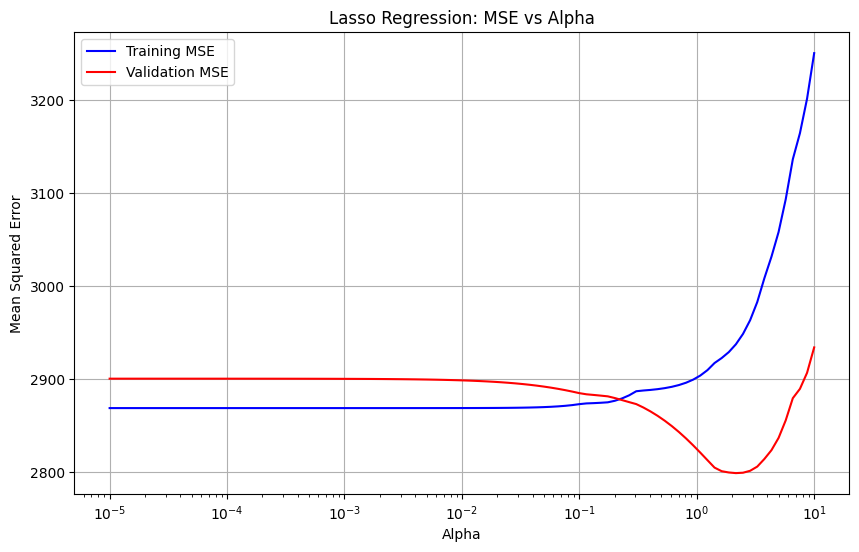

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_res, label='Training MSE', color='blue')
plt.plot(alphas, mse_test_res, label='Validation MSE', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression: MSE vs Alpha')
plt.legend()
plt.grid()
plt.show()

In [ ]:
best_index = np.argmin(mse_test_res)
best_alpha = alphas[best_index]
print(best_alpha)

2.1544346900318865


## Visualizacion de Coeficientes

In [ ]:
# Convert coefficients list to a numpy array for easier manipulation
coeff_array = np.array(coefficients)

In [ ]:
coeff_array.shape

(100, 10)

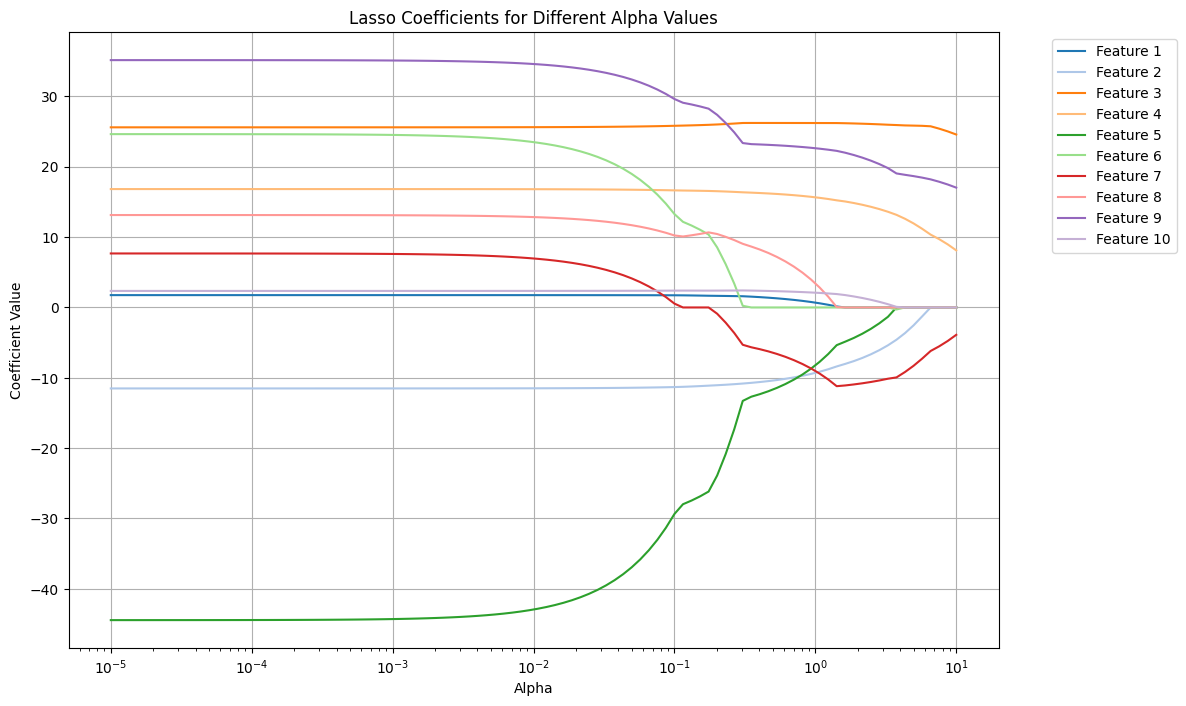

In [ ]:
# Plot the coefficients for different alpha values
plt.figure(figsize=(12, 8))

# Number of features in the dataset
n_features = coeff_array.shape[-1]

# Use the 'tab20' colormap which has 20 distinct colors
colors = plt.get_cmap('tab20', 20)

# Plot each feature's coefficient
for i in range(n_features):
    plt.plot(alphas, coeff_array[:,i], label=f'Feature {i+1}', color=colors(i))

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients for Different Alpha Values')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

## Entranamiento con mejor Alpha

In [ ]:
lasso_reg = make_pipeline( StandardScaler(), Lasso(alpha=best_alpha, max_iter=10000))

lasso_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_reg.predict(X_train)
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Lasso Regression Model Mean Squared Error (train): {train_mse:.2f}')
print(f'Lasso Regression Model Mean Squared Error (test): {test_mse:.2f}')

#visualize_fit(X_train, y_train, lasso_reg, 'Lasso Regression on Non-Linear Data')

Lasso Regression Model Mean Squared Error (train): 2937.19
Lasso Regression Model Mean Squared Error (test): 2798.59


## Seleccion de caracteristicas

In [ ]:
# Get the coefficients
best_coefficients = lasso_reg.named_steps["lasso"].coef_

# Identify the features with non-zero coefficients
non_zero_features = np.where(best_coefficients != 0)[0]

print(f"Features selected: {non_zero_features}")
print(f"Coefficients: {best_coefficients}")

Features selected: [1 2 3 4 6 8 9]
Coefficients: [  0.          -7.17900707  26.12120896  14.59832287  -3.73440047
  -0.         -10.7815336    0.          21.29933056   1.34575048]


##Usando grid-search

In [ ]:
prefix = 'lasso__'
# Define the grid of alpha values to search
param_grid = {
    prefix + 'alpha': alphas,
    prefix + 'fit_intercept':[True, False],
    'standardscaler__with_mean' :[True, False]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV

lasso_pipe = make_pipeline(StandardScaler(), Lasso(max_iter=10000))

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso_pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590...
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01]),
                         'lasso__fit_intercept': [True, False],
                         'standardscaler__with_mean': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_[prefix + 'alpha']

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best Alpha: {best_alpha}")

Mean Squared Error: 2800.66805619101
Best Alpha: 1.6297508346206435


In [ ]:
best_model = grid_search.best_estimator_

# Obtener el modelo Lasso dentro del pipeline
best_lasso = best_model.named_steps['lasso']

best_coefficients = best_lasso.coef_

# Identify the features with non-zero coefficients
non_zero_features = np.where(best_coefficients != 0)[0]

print(f"Features selected: {non_zero_features}")
print(f"Coefficients: {best_coefficients}")


Features selected: [1 2 3 4 6 8 9]
Coefficients: [  0.          -8.02142643  26.18903241  15.06441946  -4.86012346
  -0.         -11.08667637   0.          21.99612869   1.75881184]


In [ ]:
# Get detailed results from Grid Search
results = grid_search.cv_results_

# Print grid search results
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {-mean_score:.4f} for Alpha: {params[prefix + 'alpha']}")

Mean Test Score: 3143.0145 for Alpha: 1e-05
Mean Test Score: 3143.0145 for Alpha: 1e-05
Mean Test Score: 26859.8566 for Alpha: 1e-05
Mean Test Score: 3305.5405 for Alpha: 1e-05
Mean Test Score: 3143.0143 for Alpha: 1.1497569953977357e-05
Mean Test Score: 3143.0143 for Alpha: 1.1497569953977357e-05
Mean Test Score: 26859.8565 for Alpha: 1.1497569953977357e-05
Mean Test Score: 3305.5403 for Alpha: 1.1497569953977357e-05
Mean Test Score: 3143.0142 for Alpha: 1.3219411484660286e-05
Mean Test Score: 3143.0142 for Alpha: 1.3219411484660286e-05
Mean Test Score: 26859.8563 for Alpha: 1.3219411484660286e-05
Mean Test Score: 3305.5401 for Alpha: 1.3219411484660286e-05
Mean Test Score: 3143.0140 for Alpha: 1.5199110829529332e-05
Mean Test Score: 3143.0140 for Alpha: 1.5199110829529332e-05
Mean Test Score: 26859.8561 for Alpha: 1.5199110829529332e-05
Mean Test Score: 3305.5398 for Alpha: 1.5199110829529332e-05
Mean Test Score: 3143.0138 for Alpha: 1.747528400007683e-05
Mean Test Score: 3143.0138 f

## Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {'lasso__alpha': uniform(loc=0, scale=100)}
grid_search_rs = RandomizedSearchCV (estimator=lasso_pipe,
                                     param_distributions=param_distributions,
                                     n_iter=10,
                                     cv=5,
                                     scoring='neg_mean_squared_error',
                                     random_state=42)

In [ ]:
grid_search_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('lasso', Lasso(max_iter=10000))]),
                   param_distributions={'lasso__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cdaaebd4c40>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
print(f"Mejor valor de alpha: {grid_search_rs.best_params_['lasso__alpha']}")
print(grid_search_rs.best_estimator_)

Mejor valor de alpha: 5.8083612168199465
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5.8083612168199465, max_iter=10000))])


In [ ]:
# Get the best model and its parameters
best_model = grid_search_rs.best_estimator_
best_alpha = grid_search_rs.best_params_['lasso__alpha']

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best Alpha: {best_alpha}")

Mean Squared Error: 2857.783606939841
Best Alpha: 5.8083612168199465


## Usando SGD

In [ ]:
from sklearn.linear_model import SGDRegressor
from scipy.stats import randint

In [ ]:
# Initializar SGDRegressor
sgd_pipe = make_pipeline(StandardScaler(), SGDRegressor()) # ¿por qué el StandardScaler solo aplica a la X_train?

In [ ]:
param_distributions = {'sgdregressor__eta0': uniform(loc=0.01, scale=0.09),
                       'sgdregressor__max_iter': randint(low=40, high=50),
                       'standardscaler__with_mean': [True, False]}
sgd_rs = RandomizedSearchCV (estimator=sgd_pipe,
                                     param_distributions=param_distributions,
                                     n_iter=10,
                                     cv=5,
                                     scoring='neg_mean_squared_error',
                                     random_state=42)

In [ ]:
sgd_rs.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stocha

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('sgdregressor', SGDRegressor())]),
                   param_distributions={'sgdregressor__eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e9d42e44be0>,
                                        'sgdregressor__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e9d42e445e0>,
                                        'standardscaler__with_mean': [True,
                                                                      False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
print(f"Mejores valores: {sgd_rs.best_params_}")
print(sgd_rs.best_estimator_)

Mejores valores: {'sgdregressor__eta0': 0.02636424704863906, 'sgdregressor__max_iter': 44, 'standardscaler__with_mean': True}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(eta0=0.02636424704863906, max_iter=44))])


In [ ]:
type(sgd_rs.best_params_) # ¿Cómo accedo al segundo valor del diccionario?

dict

In [ ]:
# Get the best model and its parameters
best_model = sgd_rs.best_estimator_
best_iter = sgd_rs.best_params_['sgdregressor__max_iter']


# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best eta: {best_iter}")

Mean Squared Error: 2920.1345545721874
Best eta: 44


### Probar KNN Regressor con todas las caracteristicas y despues con las elegidas por Lasso y comparar.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [189]:
# Create model
knnr = make_pipeline(StandardScaler(), KNeighborsRegressor(weights='uniform'))

# Train the model
knnr.fit(X_train, y_train)

# Make predictions
y_train_pred_knn = knnr.predict(X_train)
y_test_pred_knn = knnr.predict(X_test)

# Evaluate the model
train_mse_knn = mean_squared_error(y_train, y_train_pred_knn)
test_mse_knn = mean_squared_error(y_test, y_test_pred_knn)

print(f'KNN Regression Model Mean Squared Error (train): {train_mse_knn:.2f}')
print(f'KNN Regression Model Mean Squared Error (test): {test_mse_knn:.2f}')

KNN Regression Model Mean Squared Error (train): 2553.65
KNN Regression Model Mean Squared Error (test): 3047.45


In [ ]:
# Seleccionar columnas con los índices 1, 2, 3, 4, 6, 8, 9
X_train_lasso = X_train.iloc[:, [1, 2, 3, 4, 6, 8, 9]]
X_test_lasso = X_test.iloc[:, [1, 2, 3, 4, 6, 8, 9]]

# Mostrar el result
X_test_lasso.columns.to_list()

['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']

In [ ]:
# Create model
knnr_lasso = make_pipeline(StandardScaler(), KNeighborsRegressor(weights='uniform'))

# Train the model
knnr_lasso.fit(X_train_lasso, y_train)

# Make predictions
y_train_pred_knn_lasso = knnr_lasso.predict(X_train_lasso)
y_test_pred_knn_lasso = knnr_lasso.predict(X_test_lasso)

# Evaluate the model
train_mse_knn_lasso = mean_squared_error(y_train, y_train_pred_knn_lasso)
test_mse_knn_lasso = mean_squared_error(y_test, y_test_pred_knn_lasso)

print(f'KNN Regression Lasso Model Mean Squared Error (train): {train_mse_knn_lasso:.2f}')
print(f'KNN Regression Lasso Model Mean Squared Error (test): {test_mse_knn_lasso:.2f}')

KNN Regression Lasso Model Mean Squared Error (train): 2607.96
KNN Regression Lasso Model Mean Squared Error (test): 2924.87


In [188]:
print(f'Linear Model Mean Squared Error (test): {test_mse:.2f}') # Regresion Lineal
print(f'Ridge Regression Model Ridge Mean Squared Error (test): {test_mse_l2:.2f}') # Regresion Ridge
print(f'KNN Regression Lasso Model Mean Squared Error (test): {test_mse_knn_lasso:.2f}') # KNN con Lasso
print(f'Ridge Regression Model mejor Alpha Mean Squared Error (test): {test_mse_l2:.2f}') # Regresion Ridge con Alpha minimo


Linear Model Mean Squared Error (test): 2798.59
Ridge Regression Model Ridge Mean Squared Error (test): 2854.04
KNN Regression Lasso Model Mean Squared Error (test): 2924.87
Ridge Regression Model mejor Alpha Mean Squared Error (test): 2854.04
